# Working with time series, frequency series, and unit conversion

In this notebook, we show some of the most useful features of the [timeseries](../series.rst) module. To do so, we will analyze a fake gravitational-wave signal. We will also show the [frequencyseries](../series.rst) module and the [unitconv](../unitconv.rst) modules.

First, let's generate this signal. 

(This notebook is meant to be converted in Sphinx documentation and not used directly.)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from kuibit import timeseries as ts
from kuibit import series
from kuibit import unitconv as uc
from kuibit.gw_utils import luminosity_distance_to_redshift

%matplotlib inline

In [2]:
t = np.linspace(0, 20, 5000)
y = np.sin(t)

# Generate a TimeSeries by providing the times and the values of the series
gw = ts.TimeSeries(t, y)

To access the times and the values, use ``gw.t`` and ``gw.y``. You can also iterate over the series with a for loop yielding the elements `(t, y)` at each iteration of the loop. For example.

In [3]:
for tt, yy in gw:
    print(tt, yy)

0.0 0.0
0.004000800160032006 0.004000789486971321
0.008001600320064013 0.008001514935783532
0.012002400480096018 0.012002112309302542
0.016003200640128026 0.016002517572444287
0.020004000800160033 0.020002666693199687
0.024004800960192037 0.024002495643659576
0.028005601120224044 0.028001940401039562
0.03200640128025605 0.03200093694870479
0.03600720144028806 0.03599942127719461
0.040008001600320066 0.03999732938524717
0.04400880176035207 0.0439945972808238
0.048009601920384073 0.04799116098213332
0.05201040208041608 0.05198695651865616
0.05601120224044809 0.055981919932168285
0.060012002400480095 0.059975987277764924
0.0640128025605121 0.06396909462488413
0.0680136027205441 0.06796117805833003
0.07201440288057612 0.07195217367929596
0.07601520304060812 0.07594201760638712
0.08001600320064013 0.07993064597664322
0.08401680336067213 0.08391799494656059
0.08801760352070415 0.08790400069311417
0.09201840368073615 0.09188859941477902
0.09601920384076815 0.09587172733255157
0.10002000400080

 -0.727861869492979
3.9607921584316865 -0.73059948075566
3.9647929585917185 -0.7333253977650076
3.9687937587517506 -0.7360395768889568
3.9727945589117826 -0.7387419746833238
3.9767953590718146 -0.7414325478925008
3.9807961592318466 -0.7441112534501492
3.984796959391878 -0.746778048479888
3.98879775955191 -0.7494328902959818
3.992798559711942 -0.7520757364040217
3.996799359871974 -0.7547065445016072
4.000800160032006 -0.7573252724790227
4.004800960192038 -0.7599318784199115
4.00880176035207 -0.7625263206019469
4.012802560512102 -0.7651085574975001
4.016803360672134 -0.7676785477743046
4.020804160832166 -0.7702362502961178
4.024804960992198 -0.7727816241233798
4.02880576115223 -0.7753146285138686
4.032806561312262 -0.7778352229233517
4.036807361472294 -0.780343367006236
4.040808161632326 -0.7828390206162126
4.044808961792358 -0.7853221438069
4.04880976195239 -0.7877926968324835
4.052810562112422 -0.7902506401483512
4.056811362272454 -0.7926959344117269
4.060812162432486 -0.79512854048230

0.9997216772981923
7.881576315263053 0.9996192909413084
7.885577115423085 0.9995009042976286
7.889577915583117 0.9993665192620944
7.893578715743149 0.9992161379857238
7.897579515903181 0.9990497628755769
7.901580316063213 0.9988673965947168
7.905581116223245 0.9986690420621678
7.909581916383277 0.9984547024528679
7.913582716543309 0.9982243811976187
7.917583516703341 0.9979780819830295
7.921584316863373 0.9977158087514595
7.925585117023405 0.9974375657009539
7.929585917183437 0.9971433572851767
7.933586717343469 0.9968331882133398
7.937587517503501 0.9965070634501274
7.941588317663533 0.9961649882156166
7.945589117823565 0.9958069679851939
7.949589917983597 0.9954330084894671
7.953590718143629 0.9950431157141746
7.957591518303661 0.9946372959000881
7.961592318463693 0.9942155555429143
7.965593118623725 0.9937779013931897
7.969593918783756 0.9933243404561733
7.973594718943788 0.992854879991734
7.97759551910382 0.9923695275142346
7.981596319263852 0.9918682907924117
7.985597119423884 0.9

11.774354870974195 -0.7117705998350665
11.778355671134227 -0.7089547008673053
11.782356471294259 -0.7061274541007951
11.78635727145429 -0.7032889047895236
11.790358071614323 -0.7004390983683911
11.794358871774355 -0.6975780804524842
11.798359671934387 -0.694705896836344
11.802360472094419 -0.6918225934932348
11.80636127225445 -0.6889282165744072
11.810362072414483 -0.6860228124083595
11.814362872574515 -0.6831064275000966
11.818363672734547 -0.6801791085303854
11.822364472894579 -0.6772409023550071
11.826365273054611 -0.6742918560040081
11.830366073214643 -0.6713320166809466
11.834366873374675 -0.6683614317621371
11.838367673534707 -0.6653801487958926
11.842368473694739 -0.6623882155017625
11.846369273854771 -0.65938567976977
11.850370074014803 -0.6563725896596446
11.854370874174835 -0.6533489934000534
11.858371674334867 -0.6503149393878286
11.862372474494899 -0.6472704761871936
11.866373274654931 -0.6442156525289849
11.870374074814963 -0.6411505173098727
11.874374874974995 -0.63807511

15.93118623724745 -0.22137377172072134
15.93518703740748 -0.2252735260617174
15.939187837567513 -0.2291696745889247
15.943188637727545 -0.23306215493910543
15.947189437887577 -0.23695090480773767
15.951190238047609 -0.24083586195001114
15.95519103820764 -0.2447169641818233
15.959191838367673 -0.2485941493807748
15.963192638527705 -0.2524673554871638
15.967193438687737 -0.25633652050497935
15.971194238847769 -0.2602015825028937
15.9751950390078 -0.26406247961525353
15.979195839167833 -0.2679191500430704
15.983196639327865 -0.2717715320550096
15.987197439487897 -0.2756195639883786
15.991198239647929 -0.2794631842501139
15.99519903980796 -0.2833023313177667
15.999199839967993 -0.28713694374048804
16.003200640128025 -0.29096696014001217
16.007201440288057 -0.2947923192116389
16.01120224044809 -0.29861295972521523
16.01520304060812 -0.302428820526115
16.019203840768153 -0.30623984053621806
16.023204640928185 -0.3100459587548878
16.027205441088217 -0.31384711425994744
16.03120624124825 -0.31

19.931986397279456 0.8831007529574059
19.935987197439488 0.8849707893366684
19.93998799759952 0.8868266605366835
19.943988797759552 0.8886683368516701
19.947989597919584 0.8904957888030566
19.951990398079616 0.8923089871399514
19.955991198239648 0.8941079028396118
19.95999199839968 0.8958925071079088
19.963992798559712 0.897662771379787
19.967993598719744 0.8994186673197229
19.971994398879776 0.9011601668221778
19.975995199039808 0.9028872420120478
19.97999599919984 0.9045998652451104
19.983996799359872 0.9062980091084663
19.987997599519904 0.9079816464209782
19.991998399679936 0.909650750233707
19.995999199839968 0.9113052938303416
20.0 0.9129452507276277


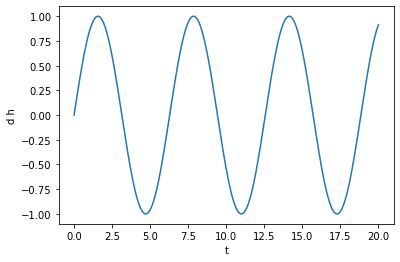

In [4]:
def plot(ser, lab1="d h", lab2="t", *args, **kwargs):
    """Plot Series ser with labels"""
    plt.ylabel(lab1)
    plt.xlabel(lab2)
    plt.plot(ser, *args, **kwargs)
    
plot(gw)

Let's make this more interesting: we square the signal and add Gaussian noise. [TimeSeries](../timeseries_ref.html#kuibit.timeseries.TimeSeries) support directly using all the basic mathematical operations in Python and NumPy, so we can easily square the signal and add another TimeSeries to it.

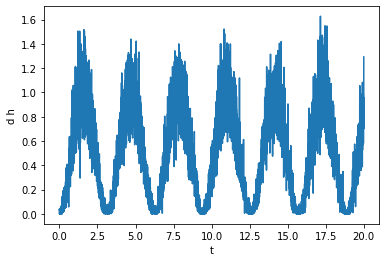

In [5]:
noise = np.random.normal(0, 0.1, len(gw))  # Here we used len() on the TimeSeries
noise_ts = ts.TimeSeries(t, noise)

gw += noise_ts
gw **= 2

plot(gw)

To analyze this signal, first we will smooth it. To do that, we will use the [savgol_smooth_time](../timeseries_ref.html#kuibit.timeseries.TimeSeries.savgol_smooth_time) method, which is a generalized "running average" filter. This method requires length of time over which we want to smooth the data.

In [TimeSeries](../timeseries_ref.html#kuibit.timeseries.TimeSeries) there are always two different methods to do the same task, one with imperative verb (e.g., smooth), and the other with the past tense (e.g., smoothed). The first modifies the data, the second returns a new `TimeSeries` with the operation applied. Here, we will find what smoothing length to use by trial and error, so we will use the second method. 

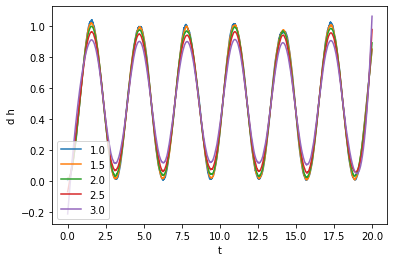

In [6]:
tsmooth = np.linspace(1, 3, 5)

for tsm in tsmooth:
    smoothed = gw.savgol_smoothed_time(tsm)
    plot(smoothed, label=tsm)
plt.legend()

From visual inspection it looks like that ``tsmooth = 1.5`` will work yield a clean series faithful to the original one.

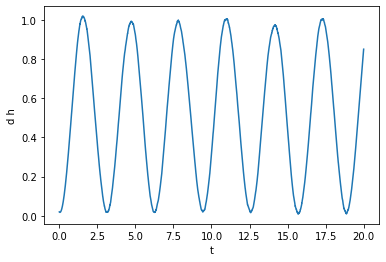

In [7]:
gw.savgol_smooth_time(1.5)
plot(gw)

Next, for fun, we can compute integrals and derivatives. For instance, we can compute what is the integral from 5 to 10.

The integral from 5 to 10 is 2.1926


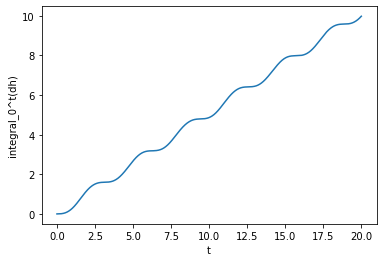

In [8]:
gw_int = gw.integrated()
a = 5
b = 10
print(f"The integral from {a} to {b} is {gw_int(b) - gw_int(a):.4f}")
plot(gw_int, lab1="integral_0^t(dh)")

Here, we showed a very powerful feature of `TimeSeries`: you can call them on a specific time (as we did we ``gw_int(b)``). This is done using splines to interpolate to the points that are not available. Splines can also be used to take derivatives. Alternatively, one can simply take the finite (central) difference. Let's see what's the derivative of ``gw`` using splines and finite difference.

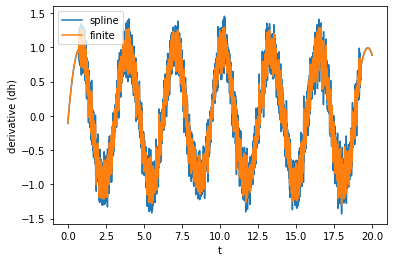

In [9]:
gw_spline_der = gw.spline_differentiated()
gw_numer_der = gw.differentiated()

plot(gw_spline_der, label='spline')
plot(gw_numer_der, lab1="derivative (dh)", label='finite')
plt.legend()

Clearly, derivatives will be noisier than the actual data, so often it is convenient to smooth them out as shown before.

TimeSeries support complex signals. Now, we will create one using `gw` itself. We will copy `gw`, time-shift it, find the common time interval with the original `gw`, and use that as a the imaginary part.

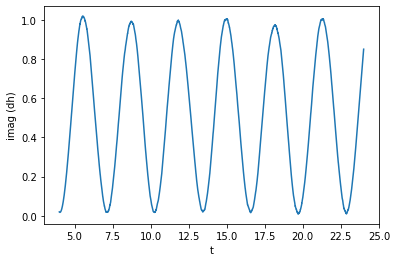

In [10]:
gw_imag = gw.copy()  # It is important to deep copy the object
gw_imag.time_shift(4)

plot(gw_imag, lab1 ="imag (dh)")

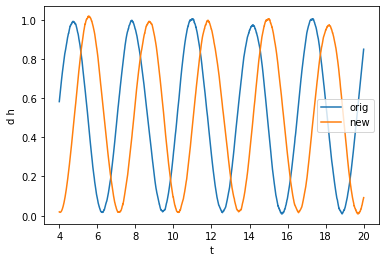

In [11]:
gw, gw_imag = series.sample_common([gw, gw_imag], resample=True)  # Resampling to common times

plot(gw, label="orig")
plot(gw_imag, label="new")
plt.legend()

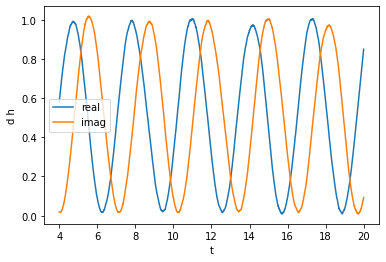

In [12]:
gw_complex = ts.TimeSeries(gw.t, gw.y + 1j * gw_imag.y)

plot(gw_complex.real(), label="real")
plot(gw_complex.imag(), label="imag")
plt.legend()

We can also compute the phase and absolute value. In particular, we will compute the unfolded phase (no wrapping over $2\pi$)

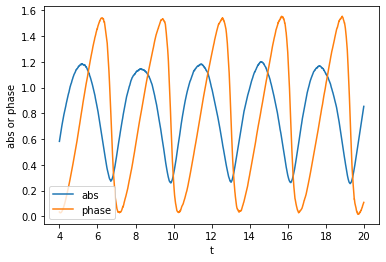

In [13]:
plot(gw_complex.abs(), label='abs')
plot(gw_complex.unfolded_phase(), lab1="abs or phase", label='phase')
plt.legend()

Here, the unfolded phase looks a little bit unusual. This is because we made up the signal.

We can also compute the frequency of the phase, which we can directly smooth.

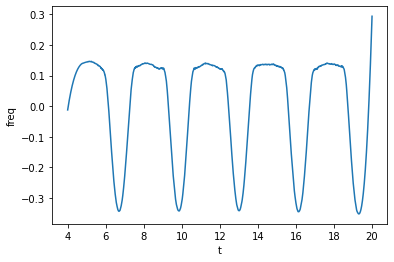

In [14]:
plot(gw_complex.phase_frequency(tsmooth=1.5), lab1="freq")

Next, we will take a Fourier transform. Before, let's pretend that the signal was in geometrized units (as in simulations), and let's make it physical assuming a scale of $M = 1 M_\odot$. For that, use the [unitconv](../unitconv.rst) module. We define a CU object that knows how to convert units.

In [15]:
CU = uc.geom_umass_msun(1) 

# How to convert from geometrized length to physical length?
# Simply multiply times CU.length. Let's check that it is 1.477 km
CU.length  # m

1476.6436994724972

Now we rescale `gw`, assuming that `y` is strain times distance (as usually is). Let's assume a distance of 500 Mpc.

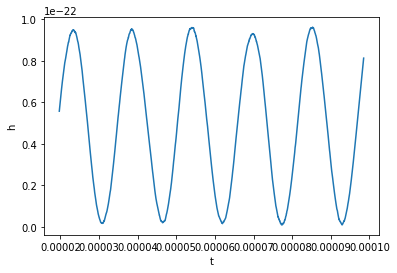

In [16]:
d_Mpc = 500

# inverse = True means from geometrized to physical
gw_physical = gw_complex.time_unit_changed(CU.time, inverse=True)  

gw_physical *= CU.length  # dh -> dh physical
# Now just the strain, since we assume a distance
gw_physical /= (d_Mpc * uc.MEGAPARSEC_SI)

# We have to manually add the redshift
gw_physical.redshifted(luminosity_distance_to_redshift(d_Mpc))

plot(gw_physical.real(), lab1="h")

Okay, now before taking the Fourier transform, we will remove the mean and window our signal. A Tukey window will work.

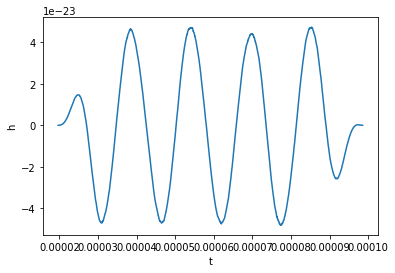

In [17]:
gw_physical.mean_remove()
gw_physical.tukey_window(0.3)
plot(gw_physical.real(), lab1="h")

Finally, we can take the Fourier transform. This is easy to do:

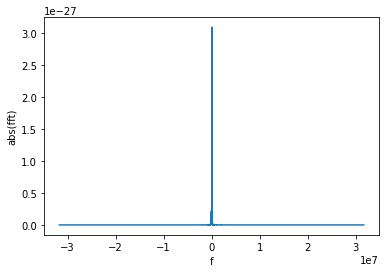

In [18]:
gw_fft = gw_physical.to_FrequencySeries()

# Plotting the amplitude of the Fourier transform
plot(gw_fft.abs(), lab1="abs(fft)", lab2="f")

The new object is a `FrequencySeries`. It is very similar to a `TimeSeries` and it shares several properties, methods, and features. 

Let's restrict to only positive frequencies close to zero.

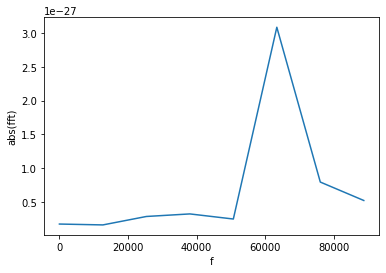

In [19]:
gw_fft.crop(0, 1e5)
plot(gw_fft.abs(), lab1="abs(fft)", lab2="f")

We can find the frequency of that peak! For this, we find all the peaks with amplitude larger than 1e-27.

Frequency: 64108.38


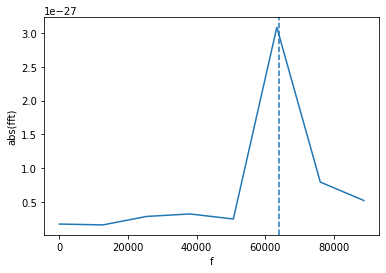

In [20]:
f_peak = gw_fft.peaks_frequencies(1e-27)[0]

print(f"Frequency: {f_peak:.2f}")
plot(gw_fft.abs(), lab1="abs(fft)", lab2="f")
plt.axvline(f_peak, ls = 'dashed')

The line is not on the maximum because we use a quadratic interpolation to find a more accurate location of the peak.

Sometimes, it is useful to ignore some data (or example, when we know that the data is invalid). `Series` objects support _masks_ to mark the points we want to ignore. Most functions work transparently with masks: for example, if you ask for the mean of a `Series`, the masked point will be ignored. Other functions do not support masks (most notably, splines). In that case, it is best to completely remove the masked points and work with clean data.

In [21]:
# Let's mask all the point in the spectrum with value larger than 1e-27

spectrum = gw_fft.abs()

print(f"Maximum without mask {spectrum.max():.3e}")

# Apply mask
spectrum.mask_greater(1e-27)

print(f"Maximum with mask {spectrum.max():.3e}")

print(f"Length with mask {len(spectrum)}")

# Remove points
spectrum.mask_remove()

print(f"Length after having removed the masked points {len(spectrum)}")

Maximum without mask 3.085e-27
Maximum with mask 7.966e-28
Length with mask 8
Length after having removed the masked points 7
